<a href="https://colab.research.google.com/github/tchappui/heia-cours-technique-de-reaction/blob/master/Chapitre4/CTR01_Exercice4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Corrigé de l'exercice 4.1

On considère la réaction d’isomérisation en phase gazeuse suivante, réalisée en conditions isothermes:

$𝐴\to 𝐵$

La réaction est d’abord réalisées en laboratoire à une température de 500 K et une pression de 830 kPa avec un réacteur initialement chargé avec du A pur. Le débit molaire de A entrant est de $𝐹_{𝐴0}$_= 0.4 mol/s.

Les données expérimentales sont données ci-dessous:

* X = [0, 0.1, 0.2, 0.4, 0.6, 0.7, 0.8]
* -RA = [0.45, 0.37, 0.30, 0.195, 0.113, 0.079, 0.05]  mol/(m3*s)

Dans un réacteur CSTR:

* Calculer le volume nécessaire pour obtenir une conversion de 80 %.

Dans un réacteur tubulaire:

* Calculer le volume nécessaire pour obtenir une conversion de 80 %.
* Tracer un profil de la conversion en fonction de la position dans le réacteur.
* Comparer les deux types de réacteurs.

## Solution

On commence par inporter les différents packages. Nous allons utiliser la fonction interp1d() du module scipy.interpolate pour interpoler linéairement entre les points expérimentaux et la fonction np.trapz() pour intégrer sous la courbe par la méthode des trapèzes.


In [0]:
import numpy as np
from scipy.integrate import cumtrapz
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

On commence par définir les données à utiliser:

In [0]:
FA0 = 0.4 # mol/s
X = np.array([0, 0.1, 0.2, 0.4, 0.6, 0.7, 0.8]) # -
RA = np.array([-0.45, -0.37, -0.30, -0.195, -0.113, -0.079, -0.05]) # mol/(m3*s)
Y = FA0 / -RA # m3


Afin de se faciliter la vie pour la suite, on interpole linéairement entre les points pour avoir plus de points. Pour ce faire, la fonction interp1d() permet de fabriquer une fonction d'interpolation à partir des résultats expérimentaux.

In [0]:
interpoler = interp1d(X, Y)

On déssine notre diagramme de Levenspiel, il vient:

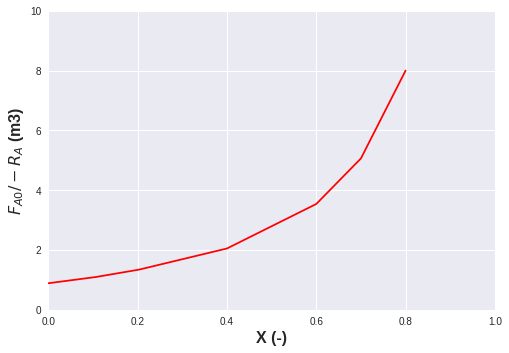

In [16]:
Xsim = np.linspace(0, 0.8, 801)
Ysim = interpoler(Xsim)
plt.plot(Xsim, Ysim, 'r-')
plt.xlabel('X (-)', fontweight='bold', fontsize=16)
plt.ylabel('$F_{A0}/-R_{A}$ (m3)', fontweight='bold', fontsize=16)
plt.axis([0, 1, 0, 10])
plt.show()

On calcul les volumes des réacteurs CSTR et PFR de la manière suivante en Python:

In [17]:
VCSTR = Y[-1] * 0.8
VCSTR # m3

6.4

In [18]:
VPFR = np.trapz(Ysim, Xsim)
VPFR # m3

2.2001115280604475

Pour tracer la conversion en fonction de la position dans le réacteur, i.e. le volume, on inverse notre façon de penser et on calcule les volumes correspondant à des conversions de 0, 0.05, 0.1, ...

Pour ce faire, on peut faire une intégrale cumulée sous la courbe du diagramme de Levenspiel. Il vient:

In [21]:
get_y = interp1d(x=X, y=Y)
Xs = np.arange(0, 0.8, 0.05)
Ys = get_y(Xs)
Vs = cumtrapz(x=Xs, y=Ys)
Vs

array([0.04684685, 0.0984985 , 0.15570571, 0.21921922, 0.29037307,
       0.37050127, 0.45960383, 0.55768076, 0.66954824, 0.80002249,
       0.94910349, 1.11679126, 1.31282577, 1.54694697, 1.83682039])

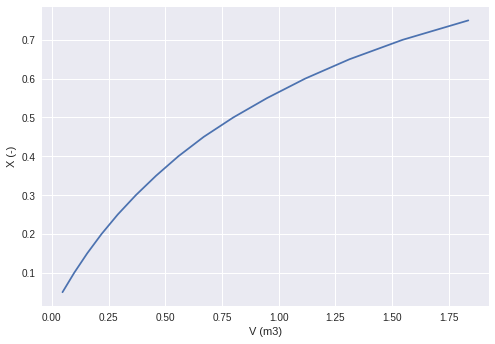

In [22]:
plt.plot(Vs, Xs[1:])
plt.xlabel('V (m3)')
plt.ylabel('X (-)')
plt.show()